## Maximisation de l'utilité sous contrainte

_F-X. Dehon - dehon[@]unice.fr - 14 avr 2020_

Utilité $U(x,y)=(x+2)(x+3y)$ sous les contraintes $x\geq 0$, $y\geq 0$ et $5x+3y\leq r$.

On dessine :

- en orange le graphe de la fonction utilité : l'ensemble des points $(x\geq 0,y\geq 0,z)$ tels que $z=U(x,y)$
- en vert le plan donné par la contrainte (saturée) de revenu disponible et du coût des biens : $5x+3y=r(=20)$
- en bleu clair le plan $z=u (=42)$.

On visualise ainsi

- les $(x,y)$ tels que $U(x,y)$ soit maximal sous les contraintes $x\geq 0$, $y\geq 0$ et $5x+3y\leq r$,
- le graphe de la restriction de $U$ à l'ensemble des $(x,y)$ tels que $x\geq 0$, $y\geq 0$ et $5x+3y=r$, de même que ceux des restrictions de $U$ aux $(x,0),\ x\geq 0$ et aux $(0,y),\ y\geq 0$,
- la ligne de niveau $U(x,y)=u (=42)$

##### 1. Graphe de la fonction d'utilité

In [1]:
r=20;u=42
x,y,z = var('x,y,z')
xmax,ymax,zmax=(8,8,80)

b(x,y)=r-(5*x+3*y) #contrainte revenu - prix
U(x,y)=(x+2)*(x+3*y) #utilité

In [2]:
A=line3d([(0,0,0),(xmax,0,0),(0,0,0)])+line3d([(0,0,0),(0,ymax,0),(0,0,0)])+line3d([(0,0,0),(0,0,zmax),(0,0,0)])#bug avec line3d et threejs
T=text3d(' x ', (xmax/2, -.5, -.5))+text3d(' y ', (-.5, ymax/2, -.5))+text3d(' z ', (-.5, -.5,zmax/2))+text3d('0',(-.5, -.5,-.5))+text3d(str(xmax),(xmax, -.5,-.5))+text3d(str(ymax),(-.5,ymax,-.5))+text3d(str(zmax),(-.5,-.5,zmax))
B=implicit_plot3d(b,(x,0,r/5),(y,0,r/3),(z,0,zmax),color='green', opacity=0.8)
I=implicit_plot3d(z==u,(x,0,xmax),(y,0,ymax),(z,0,zmax),color='lightblue', opacity=0.5)+text3d('z='+str(u),(-.5,-.5,u))
P = implicit_plot3d(z-U(x,y),(x,0,xmax),(y,0,ymax),(z,0,zmax),color='orange', opacity=0.7)#,region=b

show(P+B+A+T+I,frame=false,aspect_ratio=[1,1,.1],viewer='threejs')

Graphics3d Object

##### 2. Lignes de niveau (appelées courbes d'indifférence en microéconomie) de la fonction d'utilité $U$

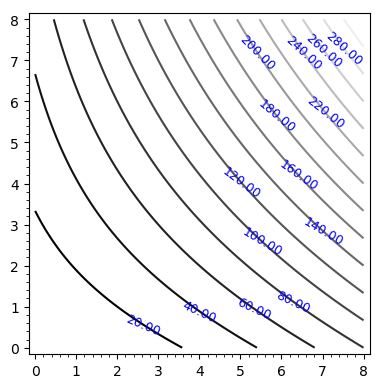

In [3]:
JJ=contour_plot(U(x,y),(x,0,xmax),(y,0,ymax),contours=15,fill=False,labels=True,label_inline=False)
show(JJ)

Courbe d'indifférence $U(x,y)=42$ (en orange), région $\big( x\geq 0\textrm{ et }y\geq 0\textrm{ et }5x+3y\leq 20\big) $ en vert, $1/10$ème du gradiant de $U$ en $(2,y)$ où $U(2,y)=42$ :

In [4]:
var('y')
x0=2;y0=solve(U(x0,y)==42,y)[0].rhs()
print y0, U(x0,y0)

17/6 42


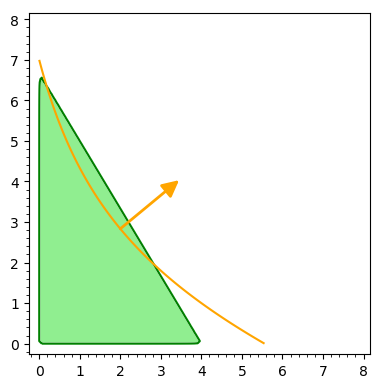

In [5]:
var('x,y')
R=region_plot([b(x,y)>=0,x>=0,y>=0],(x,-.1,xmax),(y,-.1,ymax),incol='lightgreen',bordercol='green')+implicit_plot(U(x,y)==u,(x,0,xmax),(y,0,ymax),color='orange')
G=arrow((x0,y0),vector((x0,y0))+1/10*U.gradient()(x0,y0),color='orange')
show(R+G,aspect_ratio=1)

##### 3. La courbe d'indifférence portée sur le graphe de la fonction d'utilité $U$

In [6]:
N=implicit_plot(U(x,y)==u,(x,0,xmax),(y,0,ymax)).matplotlib().get_children()[1].collections[0].get_paths()[0].to_polygons(closed_only=False)[0]
N3d=line3d([[p[0],p[1],u] for p in N],color='red')+text3d('z='+str(u),(-.5,-.5,u))
N3d0=line3d([[p[0],p[1],0] for p in N],color='black')
show(P+B+A+T+I+N3d+N3d0+line3d([[r/5,0,0],[0,r/3,0],[r/5,0,0]],color='black'),frame=false,aspect_ratio=[1,1,.1],viewer='threejs')

Graphics3d Object

##### 4. Documentation Sagemath

https://ask.sagemath.org/question/9262/get-list-of-coordinates-from-plot-object/

https://matplotlib.org/3.1.0/api/path_api.html

In [7]:
N3d=[[p[0],p[1],u] for p in N]#;print N3d
show(line3d(N3d,color='black'),aspect_ratio=[1,1,.1],viewer='threejs')

#I=implicit_plot3d((z-1)^2+(x-1)^2,(x,0,xmax),(y,0,ymax),(z,0,zmax),color='black')#n'est pas dessiné
#I=implicit_plot(U(x,y)==u,(x,0,xmax),(y,0,ymax),color='black').plot3d()#produit une erreur
#NN=line2d(N,color='black').plot3d(u)+text3d('z='+str(u),(-.5,-.5,u))

Graphics3d Object

##### 5. Max de l'utilité sous contrainte : fonction Sagemath native

In [0]:
minimize_constrained?

In [8]:
var('x,y')
bb=lambda x,y:r-(5*x+3*y)
#def bb(x,y):return(r-(5*x+3*y)
f=lambda (x,y):-U(x,y)
c0=lambda (x,y):bb(x,y)#contrainte non prise en compte si b(x,y) au lieu de bb(x,y) !
c1=lambda (x,y):x
c2=lambda (x,y):y
a=minimize_constrained(f,[c1,c2,c0],(1,2))
print 'a =',a,', b(a) =',c0(a),', U(a) =',U(*a)#comparer avec ce qu'on voit sur le dessin

a = (1.500057102546868, 4.16657149575522) , b(a) = 0.0 , U(a) = 48.9999999869572
